<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекc Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

**Описание данных:**
 - airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
 - balcony — число балконов
 - ceiling_height — высота потолков (м)
 - cityCenters_nearest — расстояние до центра города (м)
 - days_exposition — сколько дней было размещено объявление (от публикации до снятия)
 - first_day_exposition — дата публикации
 - floor — этаж
 - floors_total — всего этажей в доме
 - is_apartment — апартаменты (булев тип)
 - kitchen_area — площадь кухни в квадратных метрах (м²)
 - last_price — цена на момент снятия с публикации
 - living_area — жилая площадь в квадратных метрах(м²)
 - locality_name — название населённого пункта
 - open_plan — свободная планировка (булев тип)
 - parks_around3000 — число парков в радиусе 3 км
 - parks_nearest — расстояние до ближайшего парка (м)
 - ponds_around3000 — число водоёмов в радиусе 3 км
 - ponds_nearest — расстояние до ближайшего водоёма (м)
 - rooms — число комнат
 - studio — квартира-студия (булев тип)
 - total_area — площадь квартиры в квадратных метрах (м²)
 - total_images — число фотографий квартиры в объявлении

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
sns.set()
pd.options.display.float_format = '{:,.2f}'.format
pd.options.display.max_columns = 100




*посмотрим информацию о датасете*

In [2]:
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t') 
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,"13,000,000.00",108.00,2019-03-07T00:00:00,3,2.70,16.00,51.00,8,NaN,False,False,25.00,nan,Санкт-Петербург,"18,863.00","16,028.00",1.00,482.00,2.00,755.00,nan
1,7,"3,350,000.00",40.40,2018-12-04T00:00:00,1,nan,11.00,18.60,1,NaN,False,False,11.00,2.00,посёлок Шушары,"12,817.00","18,603.00",0.00,nan,0.00,nan,81.00
2,10,"5,196,000.00",56.00,2015-08-20T00:00:00,2,nan,5.00,34.30,4,NaN,False,False,8.30,0.00,Санкт-Петербург,"21,741.00","13,933.00",1.00,90.00,2.00,574.00,558.00
3,0,"64,900,000.00",159.00,2015-07-24T00:00:00,3,nan,14.00,nan,9,NaN,False,False,nan,0.00,Санкт-Петербург,"28,098.00","6,800.00",2.00,84.00,3.00,234.00,424.00
4,2,"10,000,000.00",100.00,2018-06-19T00:00:00,2,3.03,14.00,32.00,13,NaN,False,False,41.00,nan,Санкт-Петербург,"31,856.00","8,098.00",2.00,112.00,1.00,48.00,121.00
5,10,"2,890,000.00",30.40,2018-09-10T00:00:00,1,nan,12.00,14.40,5,NaN,False,False,9.10,nan,городской посёлок Янино-1,nan,nan,nan,nan,nan,nan,55.00
6,6,"3,700,000.00",37.30,2017-11-02T00:00:00,1,nan,26.00,10.60,6,NaN,False,False,14.40,1.00,посёлок Парголово,"52,996.00","19,143.00",0.00,nan,0.00,nan,155.00
7,5,"7,915,000.00",71.60,2019-04-18T00:00:00,2,nan,24.00,nan,22,NaN,False,False,18.90,2.00,Санкт-Петербург,"23,982.00","11,634.00",0.00,nan,0.00,nan,nan
8,20,"2,900,000.00",33.16,2018-05-23T00:00:00,1,nan,27.00,15.43,26,NaN,False,False,8.81,nan,посёлок Мурино,nan,nan,nan,nan,nan,nan,189.00
9,18,"5,400,000.00",61.00,2017-02-26T00:00:00,3,2.50,9.00,43.60,7,NaN,False,False,6.50,2.00,Санкт-Петербург,"50,898.00","15,008.00",0.00,nan,0.00,nan,289.00


In [3]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,"23,699.00","23,699.00","23,699.00","23,699.00","14,504.00","23,613.00","21,796.00","23,699.00","21,421.00","12,180.00","18,157.00","18,180.00","18,181.00","8,079.00","18,181.00","9,110.00","20,518.00"
mean,9.86,"6,541,548.77",60.35,2.07,2.77,10.67,34.46,5.89,10.57,1.15,"28,793.67","14,191.28",0.61,490.80,0.77,517.98,180.89
std,5.68,"10,887,013.27",35.65,1.08,1.26,6.60,22.03,4.89,5.91,1.07,"12,630.88","8,608.39",0.80,342.32,0.94,277.72,219.73
min,0.00,"12,190.00",12.00,0.00,1.00,1.00,2.00,1.00,1.30,0.00,0.00,181.00,0.00,1.00,0.00,13.00,1.00
25%,6.00,"3,400,000.00",40.00,1.00,2.52,5.00,18.60,2.00,7.00,0.00,"18,585.00","9,238.00",0.00,288.00,0.00,294.00,45.00
50%,9.00,"4,650,000.00",52.00,2.00,2.65,9.00,30.00,4.00,9.10,1.00,"26,726.00","13,098.50",0.00,455.00,1.00,502.00,95.00
75%,14.00,"6,800,000.00",69.90,3.00,2.80,16.00,42.30,8.00,12.00,2.00,"37,273.00","16,293.00",1.00,612.00,1.00,729.00,232.00
max,50.00,"763,000,000.00",900.00,19.00,100.00,60.00,409.70,33.00,112.00,5.00,"84,869.00","65,968.00",3.00,"3,190.00",3.00,"1,344.00","1,580.00"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [5]:
df.isnull().sum().sort_values()

total_images                0
open_plan                   0
floor                       0
rooms                       0
studio                      0
total_area                  0
last_price                  0
first_day_exposition        0
locality_name              49
floors_total               86
living_area              1903
kitchen_area             2278
days_exposition          3181
ponds_around3000         5518
parks_around3000         5518
cityCenters_nearest      5519
airports_nearest         5542
ceiling_height           9195
balcony                 11519
ponds_nearest           14589
parks_nearest           15620
is_apartment            20924
dtype: int64

### Вывод

В датафрейме 23699 строки, имеются пропуски данных(очень много пропусков), аномальные значения данных, необходимо изменить типы данных некоторых столбцов на числовые, целочисленные или булевые

## Предобработка данных

In [6]:
# для начала переименуем столбцы 
df = df.rename(columns={'cityCenters_nearest':'city_center_distance','last_price': 'price','is_apartment':'apartment','locality_name':'place','airports_nearest':'airports_distance','first_day_exposition':'exposition_date' })
# и поменяем логику столбцов для удобства восприятия
df = df[[
 'total_images',
 'open_plan',   
 'place',  
 'rooms',
 'price',  
 'studio',
 'floor',
 'floors_total',
 'total_area',
 'living_area',
 'kitchen_area',
 'balcony',
 'apartment',
 'ceiling_height',
 'city_center_distance',
 'airports_distance',
 'parks_nearest',  
 'parks_around3000',
 'ponds_nearest',
 'ponds_around3000',
 'exposition_date',
 'days_exposition',
]]
df.head()



,total_images,open_plan,place,rooms,price,studio,floor,floors_total,total_area,living_area,kitchen_area,balcony,apartment,ceiling_height,city_center_distance,airports_distance,parks_nearest,parks_around3000,ponds_nearest,ponds_around3000,exposition_date,days_exposition
0,20,False,Санкт-Петербург,3,"13,000,000.00",False,8,16.00,108.00,51.00,25.00,nan,NaN,2.70,"16,028.00","18,863.00",482.00,1.00,755.00,2.00,2019-03-07T00:00:00,nan
1,7,False,посёлок Шушары,1,"3,350,000.00",False,1,11.00,40.40,18.60,11.00,2.00,NaN,nan,"18,603.00","12,817.00",nan,0.00,nan,0.00,2018-12-04T00:00:00,81.00
2,10,False,Санкт-Петербург,2,"5,196,000.00",False,4,5.00,56.00,34.30,8.30,0.00,NaN,nan,"13,933.00","21,741.00",90.00,1.00,574.00,2.00,2015-08-20T00:00:00,558.00
3,0,False,Санкт-Петербург,3,"64,900,000.00",False,9,14.00,159.00,nan,nan,0.00,NaN,nan,"6,800.00","28,098.00",84.00,2.00,234.00,3.00,2015-07-24T00:00:00,424.00
4,2,False,Санкт-Петербург,2,"10,000,000.00",False,13,14.00,100.00,32.00,41.00,nan,NaN,3.03,"8,098.00","31,856.00",112.00,2.00,48.00,1.00,2018-06-19T00:00:00,121.00


In [7]:
# а теперь избавимся от столбцов total_images и open_plan - в дальнейшей работе они нам не понадобятся
df = df.drop(['total_images'], axis='columns')
df = df.drop(['open_plan'], axis='columns')
df.head(10)


,place,rooms,price,studio,floor,floors_total,total_area,living_area,kitchen_area,balcony,apartment,ceiling_height,city_center_distance,airports_distance,parks_nearest,parks_around3000,ponds_nearest,ponds_around3000,exposition_date,days_exposition
0,Санкт-Петербург,3,"13,000,000.00",False,8,16.00,108.00,51.00,25.00,nan,NaN,2.70,"16,028.00","18,863.00",482.00,1.00,755.00,2.00,2019-03-07T00:00:00,nan
1,посёлок Шушары,1,"3,350,000.00",False,1,11.00,40.40,18.60,11.00,2.00,NaN,nan,"18,603.00","12,817.00",nan,0.00,nan,0.00,2018-12-04T00:00:00,81.00
2,Санкт-Петербург,2,"5,196,000.00",False,4,5.00,56.00,34.30,8.30,0.00,NaN,nan,"13,933.00","21,741.00",90.00,1.00,574.00,2.00,2015-08-20T00:00:00,558.00
3,Санкт-Петербург,3,"64,900,000.00",False,9,14.00,159.00,nan,nan,0.00,NaN,nan,"6,800.00","28,098.00",84.00,2.00,234.00,3.00,2015-07-24T00:00:00,424.00
4,Санкт-Петербург,2,"10,000,000.00",False,13,14.00,100.00,32.00,41.00,nan,NaN,3.03,"8,098.00","31,856.00",112.00,2.00,48.00,1.00,2018-06-19T00:00:00,121.00
5,городской посёлок Янино-1,1,"2,890,000.00",False,5,12.00,30.40,14.40,9.10,nan,NaN,nan,nan,nan,nan,nan,nan,nan,2018-09-10T00:00:00,55.00
6,посёлок Парголово,1,"3,700,000.00",False,6,26.00,37.30,10.60,14.40,1.00,NaN,nan,"19,143.00","52,996.00",nan,0.00,nan,0.00,2017-11-02T00:00:00,155.00
7,Санкт-Петербург,2,"7,915,000.00",False,22,24.00,71.60,nan,18.90,2.00,NaN,nan,"11,634.00","23,982.00",nan,0.00,nan,0.00,2019-04-18T00:00:00,nan
8,посёлок Мурино,1,"2,900,000.00",False,26,27.00,33.16,15.43,8.81,nan,NaN,nan,nan,nan,nan,nan,nan,nan,2018-05-23T00:00:00,189.00
9,Санкт-Петербург,3,"5,400,000.00",False,7,9.00,61.00,43.60,6.50,2.00,NaN,2.50,"15,008.00","50,898.00",nan,0.00,nan,0.00,2017-02-26T00:00:00,289.00


In [8]:
# Приведём дату публикации к типу даты 
df['exposition_date'] = pd.to_datetime(df['exposition_date'], format='%Y-%m-%dT%H:%M:%S')
df['exposition_date'] 

0       2019-03-07
1       2018-12-04
2       2015-08-20
3       2015-07-24
4       2018-06-19
           ...    
23694   2017-03-21
23695   2018-01-15
23696   2018-02-11
23697   2017-03-28
23698   2017-07-21
Name: exposition_date, Length: 23699, dtype: datetime64[ns]

К студиям! проверим количество 0 комнат

In [9]:
df[df['rooms'] == 0]

,place,rooms,price,studio,floor,floors_total,total_area,living_area,kitchen_area,balcony,apartment,ceiling_height,city_center_distance,airports_distance,parks_nearest,parks_around3000,ponds_nearest,ponds_around3000,exposition_date,days_exposition
144,посёлок Мурино,0,"2,450,000.00",True,2,24.00,27.00,15.50,nan,2.00,NaN,nan,nan,nan,nan,nan,nan,nan,2017-03-30,181.00
349,деревня Кудрово,0,"2,320,000.00",False,1,14.00,25.00,17.00,nan,0.00,NaN,nan,nan,nan,nan,nan,nan,nan,2017-09-27,45.00
440,Санкт-Петербург,0,"2,480,000.00",True,4,17.00,27.11,24.75,nan,2.00,NaN,nan,"15,015.00","38,171.00",nan,0.00,982.00,2.00,2018-03-12,64.00
508,посёлок Парголово,0,"3,375,000.00",False,19,26.00,34.40,24.30,nan,1.00,NaN,nan,"19,292.00","53,115.00",nan,0.00,593.00,1.00,2017-03-28,430.00
608,посёлок Шушары,0,"1,850,000.00",True,7,10.00,25.00,nan,nan,nan,NaN,nan,nan,nan,nan,nan,nan,nan,2019-02-20,29.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23210,Санкт-Петербург,0,"3,200,000.00",True,16,25.00,26.00,18.00,nan,0.00,NaN,nan,"13,222.00","11,405.00",nan,0.00,623.00,1.00,2017-09-01,14.00
23442,посёлок Мурино,0,"2,500,000.00",False,4,24.00,27.70,18.00,nan,2.00,NaN,nan,nan,nan,nan,nan,nan,nan,2017-09-28,4.00
23554,Санкт-Петербург,0,"3,350,000.00",True,8,19.00,26.00,nan,nan,nan,NaN,nan,"17,092.00","18,090.00",nan,0.00,112.00,2.00,2018-09-07,31.00
23592,Никольское,0,"1,450,000.00",False,8,9.00,29.00,18.00,nan,2.00,NaN,nan,nan,nan,nan,nan,nan,nan,2017-11-11,82.00


In [10]:
rooms_null = df[df['rooms'] == 0]
rooms_null.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 197 entries, 144 to 23637
Data columns (total 20 columns):
place                   197 non-null object
rooms                   197 non-null int64
price                   197 non-null float64
studio                  197 non-null bool
floor                   197 non-null int64
floors_total            194 non-null float64
total_area              197 non-null float64
living_area             183 non-null float64
kitchen_area            0 non-null float64
balcony                 126 non-null float64
apartment               6 non-null object
ceiling_height          82 non-null float64
city_center_distance    118 non-null float64
airports_distance       118 non-null float64
parks_nearest           29 non-null float64
parks_around3000        118 non-null float64
ponds_nearest           69 non-null float64
ponds_around3000        118 non-null float64
exposition_date         197 non-null datetime64[ns]
days_exposition         183 non-null float64


In [11]:
# Проверим, все ли это студии
df[(df['rooms'] == 0) & (df['studio'] == False)]

,place,rooms,price,studio,floor,floors_total,total_area,living_area,kitchen_area,balcony,apartment,ceiling_height,city_center_distance,airports_distance,parks_nearest,parks_around3000,ponds_nearest,ponds_around3000,exposition_date,days_exposition
349,деревня Кудрово,0,"2,320,000.00",False,1,14.00,25.00,17.00,nan,0.00,NaN,nan,nan,nan,nan,nan,nan,nan,2017-09-27,45.00
508,посёлок Парголово,0,"3,375,000.00",False,19,26.00,34.40,24.30,nan,1.00,NaN,nan,"19,292.00","53,115.00",nan,0.00,593.00,1.00,2017-03-28,430.00
780,посёлок Мурино,0,"2,600,000.00",False,8,18.00,26.10,nan,nan,1.00,NaN,nan,nan,nan,nan,nan,nan,nan,2018-02-20,45.00
839,поселок Новый Свет,0,"1,900,000.00",False,3,5.00,35.00,15.00,nan,1.00,False,2.70,nan,nan,nan,nan,nan,nan,2017-04-14,7.00
946,посёлок Мурино,0,"2,200,000.00",False,7,27.00,23.00,18.00,nan,2.00,NaN,nan,nan,nan,nan,nan,nan,nan,2016-09-27,483.00
1574,деревня Кудрово,0,"2,200,000.00",False,16,18.00,22.00,15.00,nan,1.00,NaN,nan,nan,nan,nan,nan,nan,nan,2017-11-03,81.00
1625,поселок станции Корнево,0,"1,980,000.00",False,3,4.00,23.98,10.50,nan,1.00,NaN,nan,nan,nan,nan,nan,nan,nan,2018-02-01,120.00
2532,Санкт-Петербург,0,"3,500,000.00",False,9,18.00,27.10,18.70,nan,2.00,NaN,nan,"8,175.00","32,036.00",nan,0.00,644.00,1.00,2018-02-01,70.00
3019,Сертолово,0,"2,100,000.00",False,6,10.00,24.00,18.00,nan,2.00,NaN,nan,nan,nan,nan,nan,nan,nan,2017-11-10,5.00
4115,Санкт-Петербург,0,"2,600,000.00",False,4,25.00,24.00,18.00,nan,2.00,NaN,nan,"13,330.00","10,031.00",915.00,1.00,nan,0.00,2018-02-01,42.00


In [12]:
#Все эти строки по всем параметрам студии, но не студии! Исправим!
df.loc[df['rooms'] == 0, 'studio'] = True
df[(df['rooms'] == 0) & (df['studio'] == False)]

,place,rooms,price,studio,floor,floors_total,total_area,living_area,kitchen_area,balcony,apartment,ceiling_height,city_center_distance,airports_distance,parks_nearest,parks_around3000,ponds_nearest,ponds_around3000,exposition_date,days_exposition


In [13]:
# Заменим значения площади кухни в квартирах-студиях на нули
df.loc[df['studio'] == True, 'kitchen_area'] = 0
df.loc[df['studio'] == True]

,place,rooms,price,studio,floor,floors_total,total_area,living_area,kitchen_area,balcony,apartment,ceiling_height,city_center_distance,airports_distance,parks_nearest,parks_around3000,ponds_nearest,ponds_around3000,exposition_date,days_exposition
144,посёлок Мурино,0,"2,450,000.00",True,2,24.00,27.00,15.50,0.00,2.00,NaN,nan,nan,nan,nan,nan,nan,nan,2017-03-30,181.00
349,деревня Кудрово,0,"2,320,000.00",True,1,14.00,25.00,17.00,0.00,0.00,NaN,nan,nan,nan,nan,nan,nan,nan,2017-09-27,45.00
440,Санкт-Петербург,0,"2,480,000.00",True,4,17.00,27.11,24.75,0.00,2.00,NaN,nan,"15,015.00","38,171.00",nan,0.00,982.00,2.00,2018-03-12,64.00
508,посёлок Парголово,0,"3,375,000.00",True,19,26.00,34.40,24.30,0.00,1.00,NaN,nan,"19,292.00","53,115.00",nan,0.00,593.00,1.00,2017-03-28,430.00
608,посёлок Шушары,0,"1,850,000.00",True,7,10.00,25.00,nan,0.00,nan,NaN,nan,nan,nan,nan,nan,nan,nan,2019-02-20,29.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23210,Санкт-Петербург,0,"3,200,000.00",True,16,25.00,26.00,18.00,0.00,0.00,NaN,nan,"13,222.00","11,405.00",nan,0.00,623.00,1.00,2017-09-01,14.00
23442,посёлок Мурино,0,"2,500,000.00",True,4,24.00,27.70,18.00,0.00,2.00,NaN,nan,nan,nan,nan,nan,nan,nan,2017-09-28,4.00
23554,Санкт-Петербург,0,"3,350,000.00",True,8,19.00,26.00,nan,0.00,nan,NaN,nan,"17,092.00","18,090.00",nan,0.00,112.00,2.00,2018-09-07,31.00
23592,Никольское,0,"1,450,000.00",True,8,9.00,29.00,18.00,0.00,2.00,NaN,nan,nan,nan,nan,nan,nan,nan,2017-11-11,82.00


In [14]:
# К апартаментам!Выясним количество значений в аппартаментах.
'Количество NaN в столбце is_apartment:', df['apartment'].isnull().sum()
df['apartment'].value_counts()

False    2725
True       50
Name: apartment, dtype: int64

In [15]:
# Их владельцы точно в курсе, что у них апартаменты - это они и указали, поэтому по ним данные оказались заполненными. Мы же заменим пропущенные значения на нет
df['apartment'] = df['apartment'].fillna(value=False)


Логично предположить, что если в столбцах balcony, parks_around3000, ponds_around3000 не указали данные, то истинное значение здесь равно 0, так как балконов у квартиры / водоемов или парков поблизости нет. Заменим пропуски на 0, а заодно изменим тип данных на int, так как вещественного типа данных здесь быть не может.

In [16]:
# Приведём в целочисленный тип количество парков. Заменим пропущенные значения на 0
df['parks_around3000'] = df['parks_around3000'].fillna(value=0).astype(int)
# Приведём в целочисленный тип количество прудов. Заменим пропущенные значения на 0
df['ponds_around3000'] = df['ponds_around3000'].fillna(value=0).astype(int)
# Приведём в целочисленный тип количество балконов. Заменим пропущенные значения на 0
df['balcony'] = df['balcony'].fillna(value=0).astype(int)

# Приведём в целочисленный тип стоимость квартиры
df['price'] = df['price'].astype(int)
df['days_exposition'] = df['days_exposition'].fillna(0)


Имеются пропуски высоты потолков. Минимальная высота потолков по СНиП 2.5 метра, максимальная высота не регламентируется, возьмем не более 10 метров. Все результаты выбивающиеся заменим на медиану
Визуализируем на гистограмме

Text(0.5, 0, 'Высота м.')

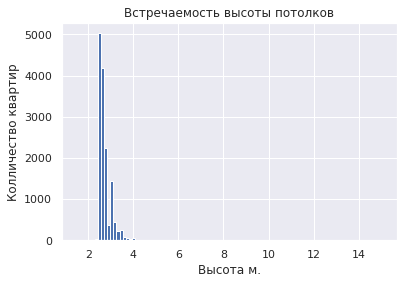

In [17]:
df['ceiling_height'].hist(bins=100, range=(1.5, 15)) 
plt.title("Встречаемость высоты потолков")
plt.ylabel("Колличество квартир")
plt.xlabel("Высота м.")

In [18]:
#Как и следовало ожидать пик высоты потолков на 2.5м. Заменяем пропуски на медиану
height_median = df['ceiling_height'].median()
df['ceiling_height'] = df['ceiling_height'].fillna(height_median)
df['ceiling_height'].isna().value_counts()

False    23699
Name: ceiling_height, dtype: int64

Избавимся от  floors_total и place, так как отсутствие этих данных помешает нам в дальнейших рассчётах

In [19]:
# Удалим записи, где отсутствует локация и этажность
df = df.dropna(subset=['place'])
df = df.dropna(subset=['floors_total'])

# Приведём этажность к целочисленному типу
df['floors_total'] = df['floors_total'].astype(int)

# Заменим пустые значения жилой площади и площади кухни на медиану
living_ratio = df['living_area'].median() / df['total_area'].median()
kitchen_ratio = df['kitchen_area'].median() / df['total_area'].median()
df['living_area'].fillna(living_ratio * df['total_area'], inplace=True)
df['kitchen_area'].fillna(kitchen_ratio * df['total_area'], inplace=True)

# Проверим количество пропущенных значений
df.isnull().sum()

place                       0
rooms                       0
price                       0
studio                      0
floor                       0
floors_total                0
total_area                  0
living_area                 0
kitchen_area                0
balcony                     0
apartment                   0
ceiling_height              0
city_center_distance     5501
airports_distance        5524
parks_nearest           15535
parks_around3000            0
ponds_nearest           14529
ponds_around3000            0
exposition_date             0
days_exposition             0
dtype: int64

In [20]:
# Пропуски расстояния до центра и непосредственно в городе Санкт-Петербурге
df['city_center_distance'].isna().sum()

5501

In [21]:
df[(df['place'] == 'Санкт-Петербург') & (df['city_center_distance'].isna())]

,place,rooms,price,studio,floor,floors_total,total_area,living_area,kitchen_area,balcony,apartment,ceiling_height,city_center_distance,airports_distance,parks_nearest,parks_around3000,ponds_nearest,ponds_around3000,exposition_date,days_exposition
81,Санкт-Петербург,1,10949000,False,6,10,68.00,39.23,11.77,0,False,2.65,nan,nan,nan,0,nan,0,2018-12-27,0.00
593,Санкт-Петербург,1,4200000,False,10,16,38.30,19.80,10.10,2,False,2.60,nan,nan,nan,0,nan,0,2019-04-16,0.00
604,Санкт-Петербург,3,9899000,False,3,5,101.00,62.00,15.00,0,False,3.00,nan,nan,nan,0,nan,0,2018-12-12,0.00
742,Санкт-Петербург,3,37000000,False,8,9,161.00,84.00,27.87,0,False,2.65,nan,nan,nan,0,nan,0,2016-05-22,402.00
795,Санкт-Петербург,2,7100000,False,2,5,59.60,36.60,12.50,0,False,3.40,nan,nan,nan,0,nan,0,2019-02-13,0.00
1336,Санкт-Петербург,1,18500000,False,7,7,66.00,25.00,35.00,1,False,3.00,nan,nan,nan,0,nan,0,2017-06-08,130.00
1872,Санкт-Петербург,1,3100000,False,2,4,32.00,19.00,5.00,0,False,2.65,nan,nan,nan,0,nan,0,2019-03-15,3.00
1895,Санкт-Петербург,5,9500000,False,2,5,130.00,90.00,15.00,0,False,2.65,nan,nan,nan,0,nan,0,2019-03-27,15.00
2364,Санкт-Петербург,1,4300000,False,17,25,32.60,14.30,8.10,0,False,2.65,nan,nan,nan,0,nan,0,2019-04-28,0.00
2707,Санкт-Петербург,2,5650000,False,5,9,51.00,31.00,10.00,0,False,3.20,nan,nan,nan,0,nan,0,2019-02-26,0.00


Думаю, что параметр расстояния до центра города важен только в Санкт-Петербурге. Поэтому квартиры без расстояния до центра в Санкт Петербурге удалим

In [22]:
df = df[(df['place'] != 'Санкт-Петербург') 
            | ((df['place'] == 'Санкт-Петербург') 
               & (~df['city_center_distance'].isna()))].reset_index(drop=True)

In [23]:
# Пропуски расстояния до аэропорта
df['airports_distance'] = df['airports_distance'].fillna(0)
df['airports_distance'] = df['airports_distance'].astype('int')
air_median = dict(df.pivot_table(index = 'place', values = 'airports_distance', aggfunc = 'median')['airports_distance'])
type(air_median)
def air_nearest(row):
    loc_name = row['place']
    air_nearest = row['airports_distance']
    if air_nearest == 0:
        for key, value in air_median.items():
            if key in loc_name:
                return value
    
    return air_nearest
df['airports_distance'] = df.apply(air_nearest, axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23505 entries, 0 to 23504
Data columns (total 20 columns):
place                   23505 non-null object
rooms                   23505 non-null int64
price                   23505 non-null int64
studio                  23505 non-null bool
floor                   23505 non-null int64
floors_total            23505 non-null int64
total_area              23505 non-null float64
living_area             23505 non-null float64
kitchen_area            23505 non-null float64
balcony                 23505 non-null int64
apartment               23505 non-null bool
ceiling_height          23505 non-null float64
city_center_distance    18064 non-null float64
airports_distance       23505 non-null float64
parks_nearest           8030 non-null float64
parks_around3000        23505 non-null int64
ponds_nearest           9036 non-null float64
ponds_around3000        23505 non-null int64
exposition_date         23505 non-null datetime64[ns]
days_expositio

In [24]:
# Код ревьюера
23505/23698

0.9918558528145835

## Расчёты и добавление результатов в таблицу

Посчитаем и добавим в таблицу:

In [25]:
# Добавим столбец со стоимостью квадратного метра (price_m2) и приведем его в целочисленный тип
df['price_m2'] = round(df['price'] / df['total_area'], 2)
df['price_m2'] = df['price'].astype(int)

# Добавим столбцы дня недели, месяца и года
df['weekday'] = df['exposition_date'].dt.weekday
df['month'] = df['exposition_date'].dt.month
df['year'] = df['exposition_date'].dt.year

# Добавим столбец с отношением жилой площади к общей (area_ratio), переведем в % и приводим его в целочисленный тип
df['area_ratio'] = df['living_area'] / df['total_area'] * 100
df['area_ratio'] = df['area_ratio'].fillna(value=0).astype(int)

# Добавляем столбец с отношением площади кухни к общей (kitchen_ratio), переведем в % и приводим его в целочисленный тип
df['kitchen_ratio'] = df['kitchen_area'] / df['total_area'] * 100
df['kitchen_ratio'] = df['kitchen_ratio'].fillna(value=0).astype(int)

# Создадим функцию для заполнения нового столбца с типом этажа
df.loc[df['floor'] == 1, 'floor_category'] = 'первый'
df.loc[df['floor'] == df['floors_total'], 'floor_category'] = 'последний'
df.loc[df['floor_category'].isna(), 'floor_category'] = 'другой'
df

,place,rooms,price,studio,floor,floors_total,total_area,living_area,kitchen_area,balcony,apartment,ceiling_height,city_center_distance,airports_distance,parks_nearest,parks_around3000,ponds_nearest,ponds_around3000,exposition_date,days_exposition,price_m2,weekday,month,year,area_ratio,kitchen_ratio,floor_category
0,Санкт-Петербург,3,13000000,False,8,16,108.00,51.00,25.00,0,False,2.70,"16,028.00","18,863.00",482.00,1,755.00,2,2019-03-07,0.00,13000000,3,3,2019,47,23,другой
1,посёлок Шушары,1,3350000,False,1,11,40.40,18.60,11.00,2,False,2.65,"18,603.00","12,817.00",nan,0,nan,0,2018-12-04,81.00,3350000,1,12,2018,46,27,первый
2,Санкт-Петербург,2,5196000,False,4,5,56.00,34.30,8.30,0,False,2.65,"13,933.00","21,741.00",90.00,1,574.00,2,2015-08-20,558.00,5196000,3,8,2015,61,14,другой
3,Санкт-Петербург,3,64900000,False,9,14,159.00,91.73,27.52,0,False,2.65,"6,800.00","28,098.00",84.00,2,234.00,3,2015-07-24,424.00,64900000,4,7,2015,57,17,другой
4,Санкт-Петербург,2,10000000,False,13,14,100.00,32.00,41.00,0,False,3.03,"8,098.00","31,856.00",112.00,2,48.00,1,2018-06-19,121.00,10000000,1,6,2018,32,41,другой
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23500,Санкт-Петербург,3,9700000,False,3,5,133.81,73.30,13.83,0,False,3.70,"4,232.00","24,665.00",796.00,1,381.00,3,2017-03-21,0.00,9700000,1,3,2017,54,10,другой
23501,Тосно,3,3100000,False,4,5,59.00,38.00,8.50,0,False,2.65,nan,0.00,nan,0,nan,0,2018-01-15,45.00,3100000,0,1,2018,64,14,другой
23502,село Рождествено,2,2500000,False,1,3,56.70,29.70,9.81,0,False,2.65,nan,0.00,nan,0,nan,0,2018-02-11,0.00,2500000,6,2,2018,52,17,первый
23503,Санкт-Петербург,2,11475000,False,12,17,76.75,44.28,23.30,2,False,3.00,"10,364.00","39,140.00",173.00,2,196.00,3,2017-03-28,602.00,11475000,1,3,2017,57,30,другой


## Исследовательский анализ данных

<div style="border:solid purple 2px; padding: 20px">
    
*Изучим следующие параметры: площадь, цена, число комнат, высота потолков*


12.0
900.0


(0, 300)

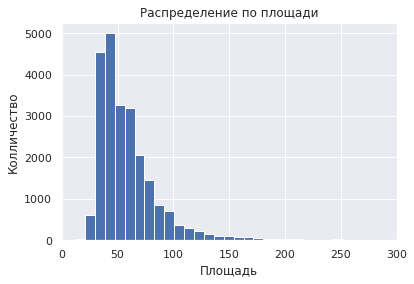

In [26]:
# площадь
df['total_area'].hist(bins=100)
print(df['total_area'].min())
print(df['total_area'].max())
plt.title("Распределение по площади")
plt.ylabel("Колличество")
plt.xlabel("Площадь")
plt.xlim(0, 300)

(0, 200)

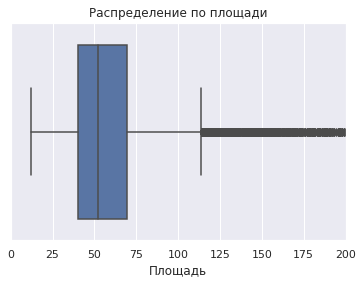

In [27]:
sns.boxplot(x=df['total_area'], orient="h")
plt.title("Распределение по площади")
plt.xlabel("Площадь")
plt.xlim(0, 200)


Малопонятны границы размаха. Напишем функцию, которая будет давать эти цифры

In [28]:
def span_charts(column):
    stat = df[column].describe()
    quantile = stat[6] - stat[4]     
    left_mustache = round(stat[4] - 1.5 * quantile, 2)
    right_mustache = round(stat[6] + 1.5 * quantile, 2)
    if left_mustache < stat[3]:
        left_mustache = stat[3] 
    if right_mustache > stat[7]:
        right_mustache = stat[7]
        
    return [left_mustache, right_mustache]
span_charts('total_area')

[12.0, 114.0]



Судя по гистограмме квартир площадью более 300 кв метров очень мало. Оставим для анализа квартиры площадью до 150 м.

Text(0.5, 0, 'Площадь')

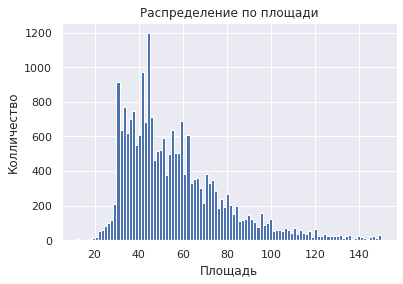

In [29]:
df['total_area'].hist(bins=100, range=(12.0, 150))
plt.title("Распределение по площади")
plt.ylabel("Колличество")
plt.xlabel("Площадь")

Создадим "хорошие" данные удобные для анализа на основе границ выбивающихся данных, в дальнейшем будем их дополнять

In [30]:
df_good = df.query('total_area <= 150')

12190
763000000


Text(0.5, 0, 'Цены')

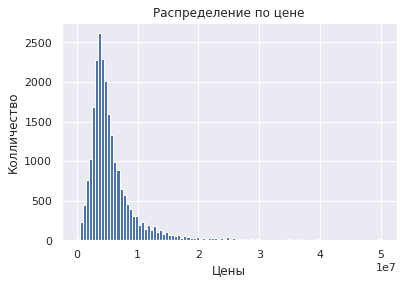

In [31]:
# цена
df['price'].hist(bins=100, range=(0, 50075000.0))
print(df['price'].min())
print(df['price'].max())
plt.title("Распределение по цене")
plt.ylabel("Колличество")
plt.xlabel("Цены")

(0, 14775000.0)

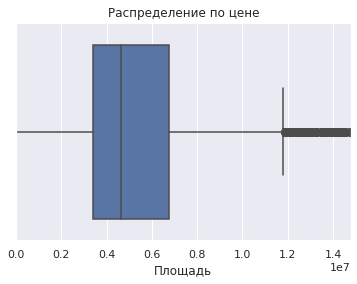

In [32]:
sns.boxplot(x=df['price'], orient="h")

plt.title("Распределение по цене")
plt.xlabel("Площадь")
plt.xlim(0, 14775000.0)

In [33]:
span_charts('price')

[12190.0, 11775000.0]

In [34]:
df_good = df_good.query('price <= 12000000.0')

0
19


(0, 10)

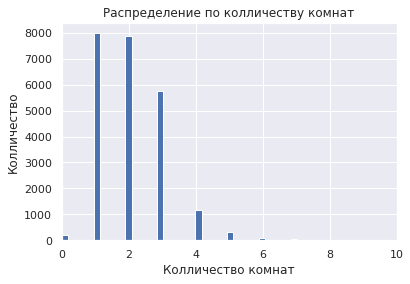

In [35]:
# количество комнат
df['rooms'].hist(bins=100)
print(df['rooms'].min())
print(df['rooms'].max())
plt.title("Распределение по колличеству комнат")
plt.ylabel("Колличество")
plt.xlabel("Колличество комнат")
plt.xlim(0, 10)

(0, 10)

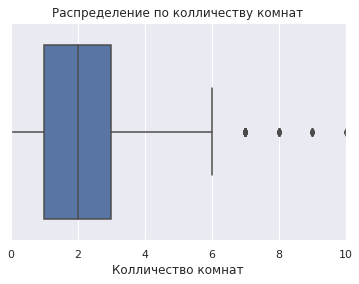

In [36]:
sns.boxplot(x=df['rooms'], orient="h")
span_charts('rooms')
plt.title("Распределение по колличеству комнат")
plt.xlabel("Колличество комнат")
plt.xlim(0, 10)

Количество квартир с комнатами больше 6 очень мало, но в Петербурге много многокомнатных коммуналок!

In [37]:
df_good = df_good.query('rooms <= 10')

1.0
100.0


Text(0.5, 0, 'Высота')

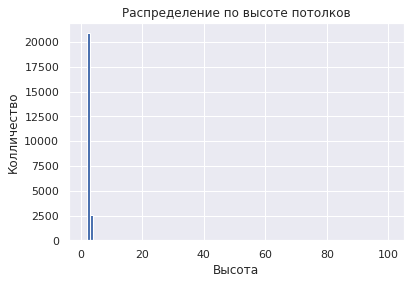

In [38]:
# высота потолков
df['ceiling_height'].hist(bins=100)
print(df['ceiling_height'].min())
print(df['ceiling_height'].max())
plt.title("Распределение по высоте потолков")
plt.ylabel("Колличество")
plt.xlabel("Высота")

Для анализа можно ораничить 5 метрами

Text(0.5, 0, 'Высота')

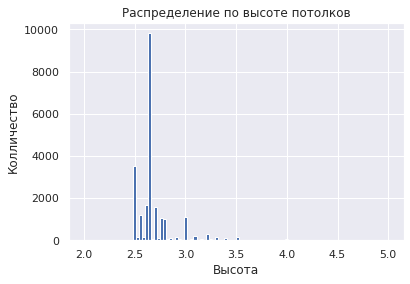

In [39]:
df['ceiling_height'].hist(bins=100, range=(2.0, 5))
plt.title("Распределение по высоте потолков")
plt.ylabel("Колличество")
plt.xlabel("Высота")

(2.2, 3)

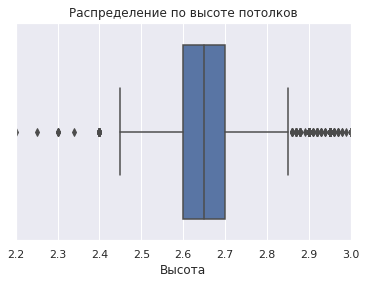

In [40]:
sns.boxplot(x=df['ceiling_height'], orient="h", )
span_charts('ceiling_height')
plt.title("Распределение по высоте потолков")
plt.xlabel("Высота")
plt.xlim(2.2, 3)

In [41]:
df_good = df_good.query('ceiling_height <= 5')

In [42]:
round(len(df_good)/len(df), 2)*100

92.0

Осталось 92 процента данных

<div style="border:solid purple 2px; padding: 20px">
    
*Изучим время продажи квартир*

(0, 1500)

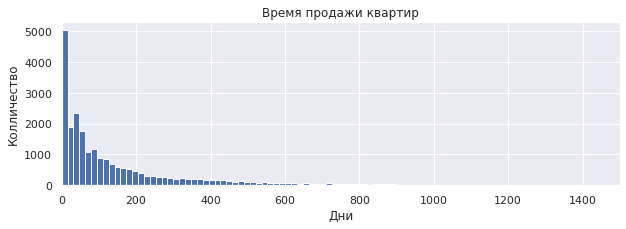

In [43]:
df['days_exposition'].hist(bins=100, figsize=(10, 3))
plt.title("Время продажи квартир")
plt.ylabel("Колличество")
plt.xlabel("Дни")
plt.xlim(0, 1500)

Text(0.5, 0, 'Дни')

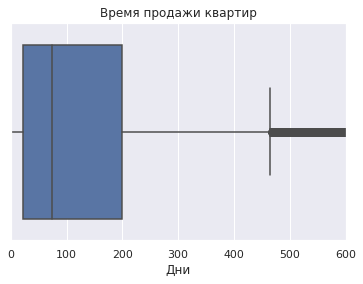

In [44]:
sns.boxplot(x=df['days_exposition'], orient="h")
plt.xlim(0, 600)
plt.title("Время продажи квартир")
plt.xlabel("Дни")

In [45]:
df['days_exposition'].describe()

count   23,505.00
mean       156.65
std        213.63
min          0.00
25%         22.00
50%         74.00
75%        199.00
max      1,580.00
Name: days_exposition, dtype: float64

Судя по полученным данным, продажа в среднем занимает 74 дней.
Если же квартира не продалась за 199 дней, то что-то не так, это слишком долго.

<div style="border:solid purple 2px; padding: 20px">
    
*Редкие и выбивающиеся значения*

Выбивающиеся значения мы определили выше. 
Статистически редко встречающиеся параметры продаваемых квартир:

 - Площадью более 114.25 кв. м
 - 7 комнат и более 
 - Продажа квартир с высотой потолков менее 2.5 метров незаконна, более 3.22 м встречаются не часто.
 - Цена более 11,7 млн рублей
 - Проданные за 428 дней или более
 
 Что касается площади и большого числа комнат, ровно как и потолков выше стандатраных 2,5 м - думаю, это всё относится к Петербургским коммуналкам.

In [46]:
# Код ревьюера
df_good['total_area'].count() / 23699

0.9092366766530233

<div style="border:solid purple 2px; padding: 20px">

*Какие факторы больше всего влияют на стоимость квартиры?*

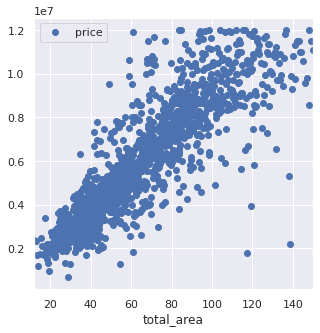

Корреляция цены и площади: 

            price  total_area
price        1.00        0.90
total_area   0.90        1.00 



In [47]:
# зависимость цены от площади квартиры 
(
    df_good.pivot_table(index='total_area', values='price')
    .plot(grid=True, style='o', figsize=(5, 5))
)
plt.show()
print('Корреляция цены и площади:','\n')
print(df_good.pivot_table(index='floor', values=['total_area', 'price']).corr(),'\n')


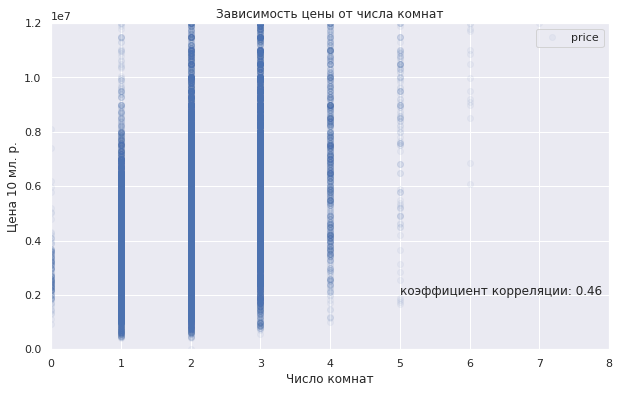

In [48]:
# зависимость цены от числа комнат
df_good.sort_values('rooms').plot(
    x='rooms', 
    y='price', 
    style='o', 
    grid=True, 
    figsize=(10, 6), 
    alpha=0.05,  
    ylim=(0,12000000), 
    xlim=(0,8)    
)
plt.title("Зависимость цены от числа комнат")
plt.xlabel("Число комнат")
plt.ylabel("Цена 10 мл. р.")
plt.text(5, 2000000, 'коэффициент корреляции: ' + str(round(df_good['price'].corr(df_good['rooms']), 2)))
plt.show()

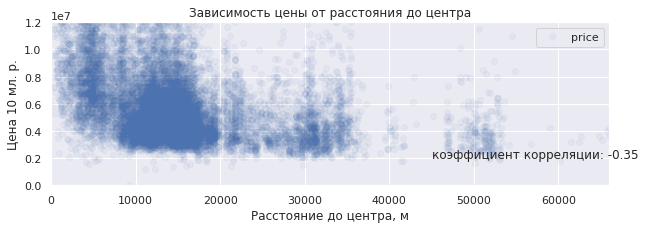

In [49]:
# зависимость цены от удаленности от центра
df_good.sort_values('city_center_distance').plot(
    x='city_center_distance', 
    y='price', 
    style='o', 
    grid=True, 
    figsize=(10, 3), 
    alpha=0.05,  
    ylim=(0,12000000), 
    xlim=(0,66000)    
)
plt.title("Зависимость цены от расстояния до центра")
plt.xlabel("Расстояние до центра, м")
plt.ylabel("Цена 10 мл. р.")
plt.text(45000, 2000000, 'коэффициент корреляции: ' + str(round(df_good['price'].corr(df_good['city_center_distance']), 2)))
plt.show()

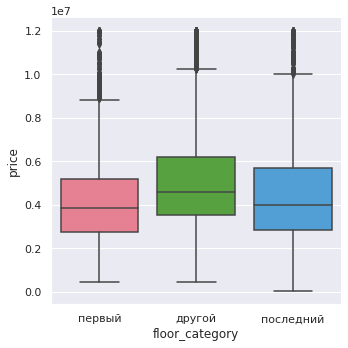

In [50]:
# зависимость от этажа
sns.catplot(x='floor_category', y='price', kind='box', data=df_good, palette='husl')


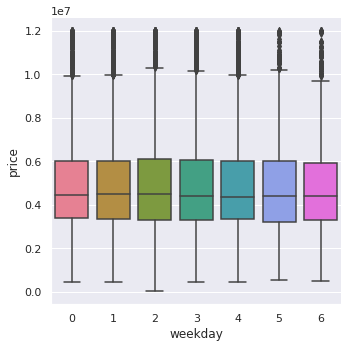

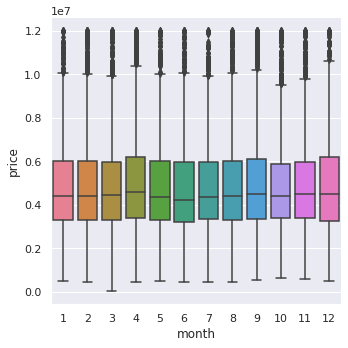

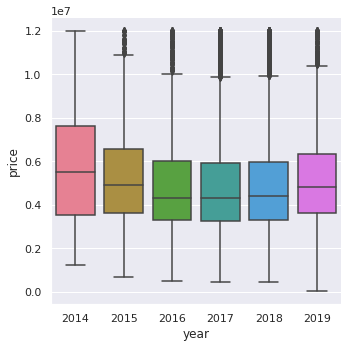

In [51]:
# зависимость от дня недели, месяца и года
for column in ['weekday', 'month', 'year']:
    sns.catplot(x=column, y='price', kind='box', data=df_good, palette='husl')

**Факторы, влияющие на стоимость квартиры**


Площадь квартиры наиболее сильно влияет на ее стоимость (коэффициент корреляции 0,66).
В меньшей степени, но все равно достаточно сильно стоимость квартиры зависит от числа комнат. (коэффициент корреляции 0,43).
Расстояние до центра тоже влияет на стоимость квартиры (коэффициент корреляции -0,31).
Квартиры на первом или последнем этаже обычно продаются дешевле, чем квартиры на других этажах.
День недели на стоимость квартир не влияет. 
В 2014 году был подъем цен, скорее всего это было связанно с экономической и политической ситуацией, когда люди стремились избавиться от своих накоплений, вложив их в недвижимость. До 2017 года было уменьшение цен, на момент 2019 года наблюдается рост цен.

<div style="border:solid purple 2px; padding: 20px">

Выберем 10 населённых пунктов с наибольшим числом объявлений 

In [52]:
data_pivot_place = df_good.pivot_table(index='place', values='price_m2', aggfunc=['count', 'median'])
data_pivot_place.columns = ['count', 'median']
data_pivot_place.sort_values('count', ascending=False).head(10)

,count,median
place,,
Санкт-Петербург,13720,"5,150,000.00"
посёлок Мурино,518,"3,400,000.00"
посёлок Шушары,439,"3,950,000.00"
Всеволожск,396,"3,450,000.00"
Пушкин,339,"4,990,000.00"
Колпино,336,"3,600,000.00"
посёлок Парголово,326,"4,100,000.00"
Гатчина,304,"3,085,000.00"
деревня Кудрово,298,"3,785,000.00"


Жилье предсказуемо дороже всего в Петербурге, в Выборге дешевле всего

<div style="border:solid purple 2px; padding: 20px">

Выделим квартиры в Санкт-Петербурге

*Выделим квартиры в Санкт-Петербурге и выясним, какая область входит в центр. Расстояние до центра приведем в километры и округлим до целых значений. Посчитаем среднюю цену для каждого километра. Затем построим график, который покажет, как цена зависит от удалённости от центра*

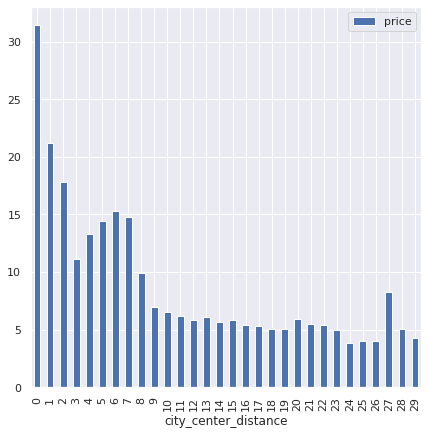

In [53]:
flats_in_spb = df.query('place == "Санкт-Петербург"')
flats_in_spb = flats_in_spb.query('city_center_distance != -1')
flats_in_spb_price = flats_in_spb.loc[:, ['place', 'city_center_distance','price']]
#приводим расстояние в км, округляем
flats_in_spb_price['city_center_distance'] = (flats_in_spb_price['city_center_distance']/1000).round().astype(int)
#приводим цену в млн
flats_in_spb_price['price'] = flats_in_spb_price['price']/1000000
flats_in_spb_pivot = flats_in_spb_price.pivot_table(index='city_center_distance', values='price', aggfunc=('mean'))
flats_in_spb_pivot.plot(y='price', kind='bar', figsize=(7, 7))

Видим четкое паделие цены с увеличением дистанции от центра Санкт-Петербурга. Будем считать, что центр имеет радиус 8 км

<div style="border:solid purple 2px; padding: 20px">

Выделим сегмент квартир в центре Санкт-Петербурга

In [54]:
flats_in_spb_center = flats_in_spb.query('city_center_distance != -1')
flats_in_spb_center['city_center_distance'] = (flats_in_spb_center['city_center_distance']/1000).round().astype(int)
flats_in_spb_center = flats_in_spb_center.query('city_center_distance < 8')
flats_in_spb_center

,place,rooms,price,studio,floor,floors_total,total_area,living_area,kitchen_area,balcony,apartment,ceiling_height,city_center_distance,airports_distance,parks_nearest,parks_around3000,ponds_nearest,ponds_around3000,exposition_date,days_exposition,price_m2,weekday,month,year,area_ratio,kitchen_ratio,floor_category
3,Санкт-Петербург,3,64900000,False,9,14,159.00,91.73,27.52,0,False,2.65,7,"28,098.00",84.00,2,234.00,3,2015-07-24,424.00,64900000,4,7,2015,57,17,другой
24,Санкт-Петербург,2,6500000,False,1,3,97.20,46.50,19.60,0,False,2.65,2,"20,052.00",411.00,3,124.00,3,2015-10-31,265.00,6500000,5,10,2015,47,20,первый
35,Санкт-Петербург,5,15500000,False,4,5,149.00,104.00,17.00,0,False,2.65,4,"23,670.00",nan,0,779.00,1,2017-06-26,644.00,15500000,0,6,2017,69,11,другой
51,Санкт-Петербург,3,45000000,False,4,8,161.00,38.00,50.00,0,False,3.20,7,"32,537.00",nan,0,99.00,3,2017-10-17,541.00,45000000,1,10,2017,23,31,другой
52,Санкт-Петербург,6,11795000,False,2,2,136.00,94.00,11.00,1,False,3.00,7,"16,510.00",526.00,1,nan,0,2017-09-22,0.00,11795000,4,9,2017,69,8,последний
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23471,Санкт-Петербург,1,4250000,False,1,6,47.00,18.20,14.60,0,False,2.65,5,"20,503.00",624.00,2,519.00,1,2016-05-20,131.00,4250000,4,5,2016,38,31,первый
23487,Санкт-Петербург,2,5250000,False,2,5,43.00,29.00,6.00,0,False,2.50,7,"28,323.00",497.00,1,660.00,2,2018-05-11,80.00,5250000,4,5,2018,67,13,другой
23496,Санкт-Петербург,2,5500000,False,2,5,52.00,31.00,6.00,0,False,2.65,6,"20,151.00",300.00,1,nan,0,2018-07-19,15.00,5500000,3,7,2018,59,11,другой
23497,Санкт-Петербург,2,9470000,False,7,25,72.90,40.30,10.60,1,False,2.75,4,"19,424.00",nan,0,806.00,1,2016-10-13,519.00,9470000,3,10,2016,55,14,другой


*изучим следующие параметры: площадь, цена, число комнат, высота потолков:*

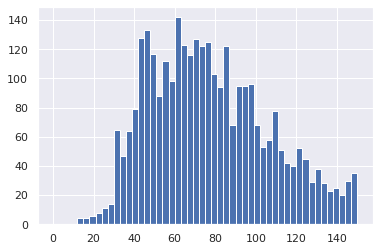

In [55]:
def draw_hist_spb(col, xmin=0, xmax=7):
    flats_in_spb_center[col].hist(bins=50, range=(xmin,xmax))
draw_hist_spb('total_area', xmax=150)

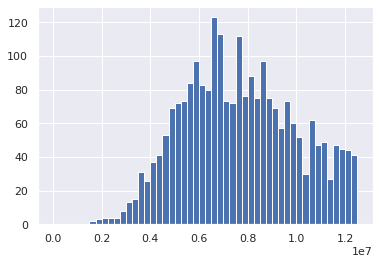

In [56]:
draw_hist_spb('price', xmax=12500000)

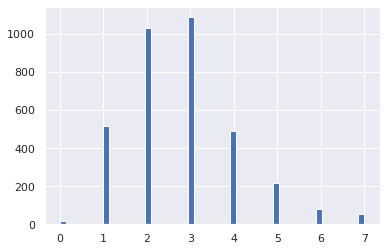

In [57]:
draw_hist_spb('rooms')

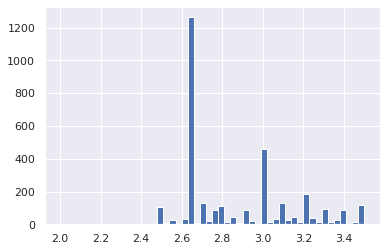

In [58]:
draw_hist_spb('ceiling_height', xmin=2, xmax=3.5)

О квартирах в центре Санкт-Петербурга можем сделать следующие выводы:

 - они имеют большую площадь - 70-80 кв.м;
 - их стоимость гораздо больше;
 - количество комнат в них больше - в основном, 2-4 комнаты;
 - потолки выше - помимо медианного значения 2.5, видим пик у значения 3

*выделим факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления)*

In [59]:
flats_in_spb_center['price_m2'].corr(flats_in_spb_center['rooms'])

0.31480770302134947

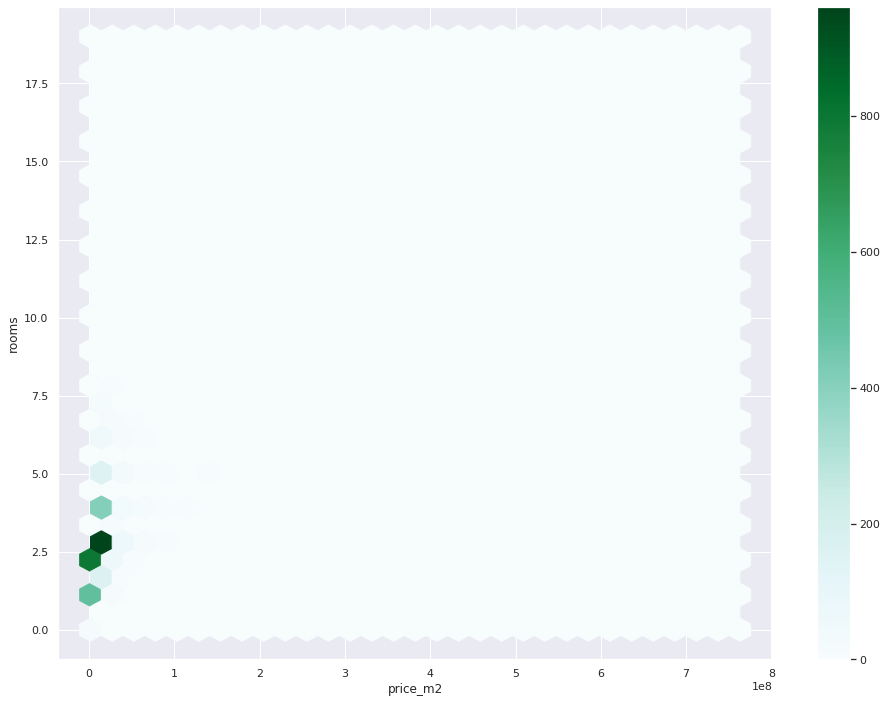

In [60]:
flats_in_spb_center.plot(x ='price_m2', y = 'rooms', kind = 'hexbin', gridsize = 30, figsize = (16,12), sharex = False, grid = True)

В центре Санкт-Петербурга стоимость квартиры и количество комнат связаны больше. С увеличением комнат в квартире стоимость квадратного метра уменьшается.

In [61]:
flats_in_spb_center['price_m2'].corr(flats_in_spb_center['city_center_distance'])

-0.04081506675315613

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


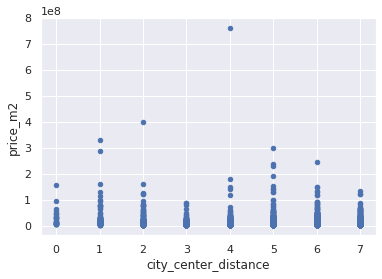

In [62]:
import warnings

warnings.filterwarnings('ignore')
flats_in_spb_center.plot(x = 'city_center_distance', y = 'price_m2', kind = 'scatter') 
plt.show()

In [63]:
# Код ревьюера
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

Взаимосвязь этих двух параметров (цены за метр кв и удаленности от центра) в центре Петербурга совсем маленькая. В центре города квартиры одинаково дорогие на километрах 0-2.

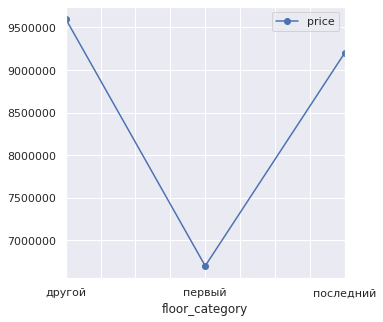

In [64]:

# Зависимость цены от этажа
(
    flats_in_spb_center.pivot_table(index='floor_category', values='price', aggfunc='median')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show()

Первый этаж непосредственно влияет на стоимость квартиры - в среднем квартиры на 1-м этаже значительно дешевле. Чуть дороже последний этаж. Наибольшая стоимость у квартир, расположенных не на 1-м и не на последнем этаже.


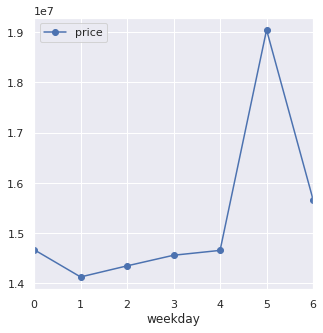

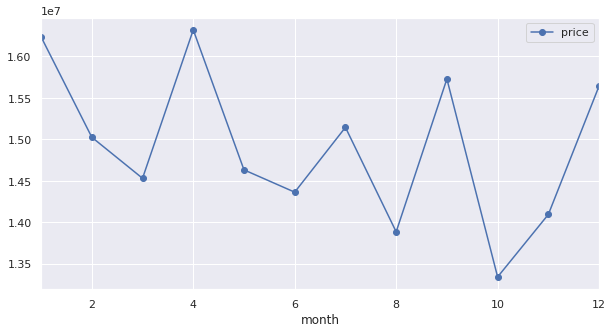

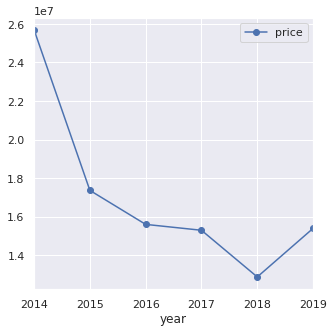

In [65]:
# Зависимость от дня размещения
(
    flats_in_spb_center.pivot_table(index='weekday', values='price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show()
# Зависимость от месяца размещения
(
    flats_in_spb_center.pivot_table(index='month', values='price')
    .plot(grid=True, style='o-', xlim=(1,12), figsize=(10, 5))
)
plt.show()
# Зависимость от года размещения
(
    flats_in_spb_center.pivot_table(index='year', values='price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show()

*Зависимость от дня, месяца и года*

День недели: дороже всего квартиры, опубликованные в субботу, дешевле всего - во вторник.

Месяц: дороже всего квартиры, выставленные на продажу в апреле, сентябре и декабре. дешевле всего - в октябре.

Год: квартиры очень сильно подешевели в 2016-2018 годах, что, вероятно, вызвано кризисом 2014-2015 годов. В 2019 году цены снова стали повышаться, т.к. экономика и зарплаты скорее на подъёме.

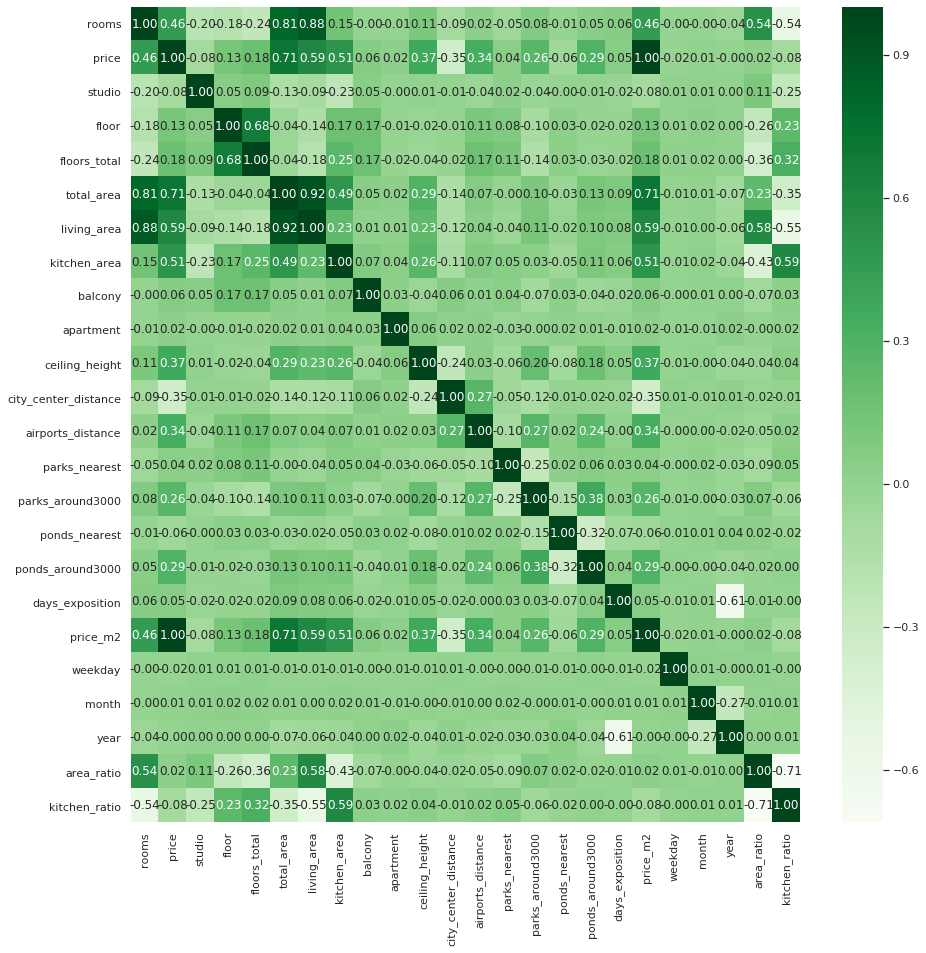

In [66]:
# Воспользуемся функцией corr() и посмотрим, как влияют определенные параметры квартиры на её финальную цену
plt.figure(figsize=(15,15))
sns.heatmap(df_good.corr(), annot=True, cmap="Greens", fmt='.2f')

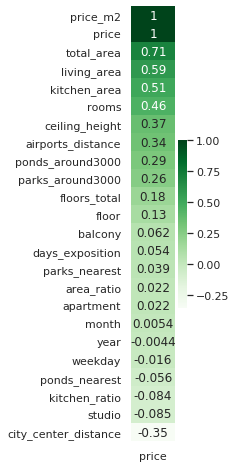

In [67]:
# Выделим только столбец price, чтоб детальней рассмотреть влияние различных параметров именно на цену:
plt.figure(figsize=(1,8))
sns.heatmap(df_good.corr()[['price']].sort_values(by='price', ascending=False), cmap="Greens", 
            annot=True, annot_kws={'size':12})

Из данных выше, мы можем сказать, что сильнее всего цена на квартиру зависит от цены за квадратный метр, от общей площади квартиры (чем больше площадь, тем выше цена), от площади жилой площади и площади кухни, а также от количества комнат. Небольшое влияние оказывает присутствие парков/водоемов рядом.
Также влияние оказывает удаленность от центра - чем дальше от центра, тем ниже цена. Ожидаемо. Таким же образом небольшое влияние оказывает удаленность от аэропорта.


## Общий вывод

Итак, мы изучили архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет, что впоследствии поможет определять рыночную стоимость объектов недвижимости.

 * заполнили пропущенные данные в исследуемых столбцах
 * установили параметры (площадь, цена, число комнат, высота потолков и др.)
 * установили связь между разными параметрами и построили графики
 * избавились от редких и выбивающихся значений
 * ответили на поставленные вопросы
 
Пришли к выводу, что для оценки рыночной стоимости недвижимости важны следующие параметры: 
1. Общая площадь квартиры 
2. Расстояние до центра города (центр города ограничен окружностью радиусом 8 км)
4. Этажность (первый этаж значительно дешевле остальных вариантов)
5. Высокие потолки будут привлекательнее
6. Правильная оценка недвижимости скажется на сроке продажи квартиры.

 Обнаружилась следующая cвязь между временем размещения объявления и стоимостью квартиры: квартиры, выставленные на продажу в декабре дороже, чем в другие месяцы; квартиры, выставленные на продажу на выходных, дешевле, чем в другие дни недели; квартиры очень сильно подешевели в 2016-2018 годах.

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  посчитано и добавлено в таблицу: цена квадратного метра
- [x]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [x]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [x]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [x]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: «Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?»
- [x]  выполнено задание: «Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили».
- [x]  выполнено задание: «Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года». 
- [x]  выполнено задание: «Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце `locality_name`».
- [x]  выполнено задание: «Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (`locality_name`). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона».
- [x]  выполнено задание: «Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всей базе?»
- [x]  в каждом этапе есть выводы
- [x]  есть общий вывод